## Imports

In [41]:
import os
import tsplib95

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read data

In [42]:
df = pd.read_csv('results.txt', sep=',', quotechar='"')
df.iloc[0].cycle1

'[186, 150, 124, 180, 1, 34, 168, 67, 29, 172, 149, 90, 94, 93, 104, 112, 132, 175, 194, 181, 75, 69, 101, 143, 22, 163, 139, 20, 153, 88, 40, 166, 59, 127, 192, 157, 76, 160, 79, 64, 176, 12, 26, 190, 146, 11, 39, 131, 110, 116, 114, 52, 0, 84, 144, 197, 122, 14, 78, 159, 19, 63, 161, 66, 30, 46, 119, 54, 41, 134, 185, 126, 111, 154, 182, 7, 16, 24, 33, 89, 142, 102, 57, 140, 170, 199, 147, 87, 97, 113, 145, 128, 21, 133, 74, 156, 106, 108, 5, 53]'

In [43]:
class CycleOptimizer:
    def __init__(self, problem_name):
        self.problem = tsplib95.load(f"{problem_name}.tsp")
        self.nodes = list(self.problem.get_nodes())
        self.distance_matrix = self._compute_distance_matrix()
        self.coords = np.array([self.problem.node_coords[i] for i in self.nodes])

    def _compute_distance_matrix(self):
        n = len(self.nodes)
        matrix = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                if i != j:
                    matrix[i][j] = self.problem.get_weight(self.nodes[i], self.nodes[j])
        return matrix

    def cycle_length(self, cycle):
        return sum(
            self.distance_matrix[cycle[i], cycle[(i + 1) % len(cycle)]]
            for i in range(len(cycle))
        )
        
    def plot_cycles(self, cycle1, cycle2, title=""):
        plt.figure(figsize=(8, 6))
        coords = self.coords

        # Draw cycle 1
        for i in range(len(cycle1)):
            a = coords[cycle1[i]]
            b = coords[cycle1[(i + 1) % len(cycle1)]]
            plt.plot([a[0], b[0]], [a[1], b[1]], 'b-', linewidth=1.5)
        plt.scatter(coords[cycle1, 0], coords[cycle1, 1], c='blue', label='Cycle 1')

        # Draw cycle 2
        for i in range(len(cycle2)):
            a = coords[cycle2[i]]
            b = coords[cycle2[(i + 1) % len(cycle2)]]
            plt.plot([a[0], b[0]], [a[1], b[1]], 'orange', linewidth=1.5)
        plt.scatter(coords[cycle2, 0], coords[cycle2, 1], c='orange', label='Cycle 2')

        # Draw labels
        for i, (x, y) in enumerate(coords):
            plt.text(x, y, str(i), fontsize=6, ha='center', va='center')

        plt.title(title)
        plt.axis('equal')
        plt.legend()
        plt.grid(True)
        plt.show()


In [44]:
instances = ["kroA200", "kroB200"]
optimizerA = CycleOptimizer(instances[0])
coordsA = optimizerA.coords
optimizerB = CycleOptimizer(instances[1])
coordsB = optimizerB.coords

In [57]:
min_totals = df.groupby(["method", "instance"], as_index=False).apply(lambda x: x.nsmallest(1, "total")).reset_index(drop=True)
min_totals

C:\Users\domin\AppData\Local\Temp\ipykernel_9336\1729273657.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  min_totals = df.groupby(["method", "instance"], as_index=False).apply(lambda x: x.nsmallest(1, "total")).reset_index(drop=True)


,method,instance,total,cycle1,cycle2
0,2-Regret,kroA200,42303.0,"[113, 87, 38, 129, 70, 55, 151, 177, 4, 42, 13...","[86, 51, 83, 47, 65, 152, 43, 115, 193, 50, 11..."
1,2-Regret,kroB200,41706.0,"[32, 82, 181, 63, 124, 105, 102, 158, 117, 88,...","[66, 197, 148, 169, 72, 84, 10, 2, 27, 128, 96..."
2,Greedy,kroA200,35323.0,"[192, 26, 197, 122, 14, 144, 84, 0, 52, 114, 1...","[175, 194, 181, 93, 90, 75, 69, 101, 143, 20, ..."
3,Greedy,kroB200,35295.0,"[108, 109, 41, 119, 63, 13, 124, 117, 184, 88,...","[197, 38, 39, 66, 196, 4, 131, 61, 25, 99, 55,..."
4,Nearest Neighbor,kroA200,36686.0,"[68, 141, 188, 130, 179, 155, 99, 32, 44, 196,...","[140, 170, 57, 199, 97, 113, 87, 147, 27, 38, ..."
5,Nearest Neighbor,kroB200,38070.0,"[73, 164, 59, 185, 195, 42, 88, 184, 158, 49, ...","[66, 196, 4, 131, 193, 116, 189, 39, 38, 69, 1..."
6,Weighted 2-Regret,kroA200,33753.0,"[23, 158, 173, 120, 45, 171, 11, 39, 146, 131,...","[175, 194, 181, 75, 69, 143, 101, 153, 20, 139..."
7,Weighted 2-Regret,kroB200,33571.0,"[111, 127, 50, 194, 155, 120, 81, 146, 32, 63,...","[66, 4, 131, 61, 25, 99, 55, 100, 149, 68, 193..."


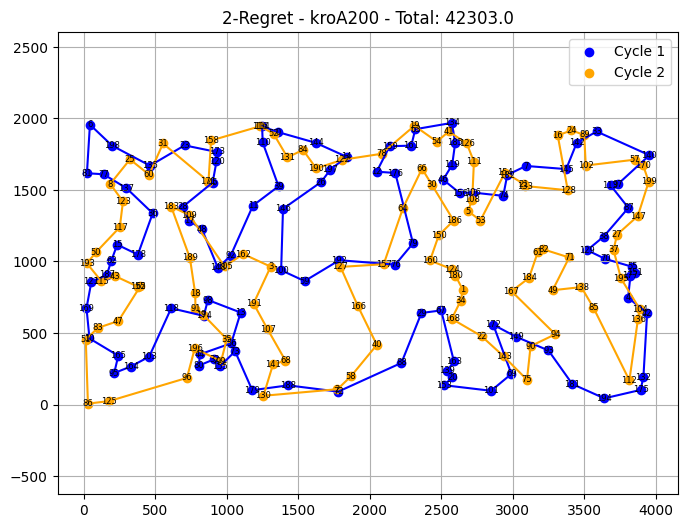

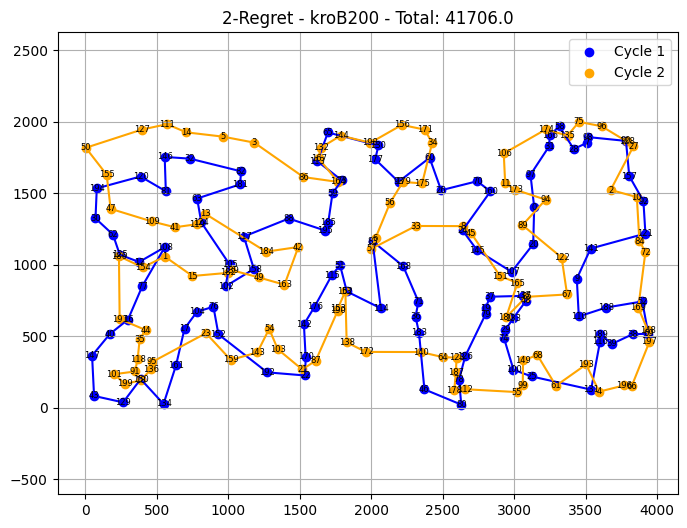

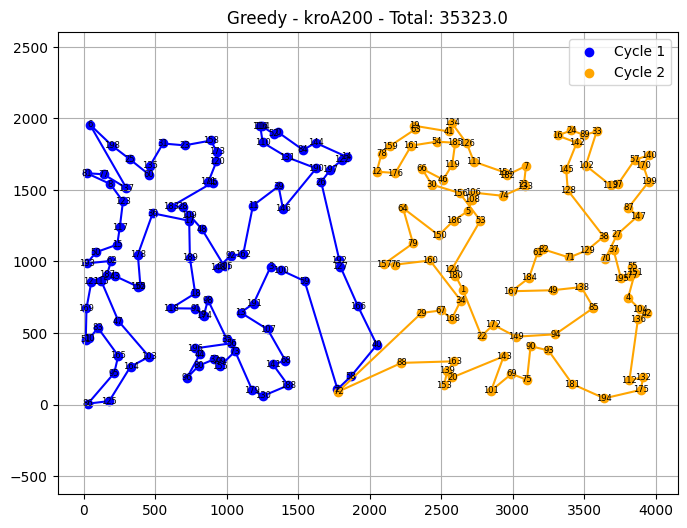

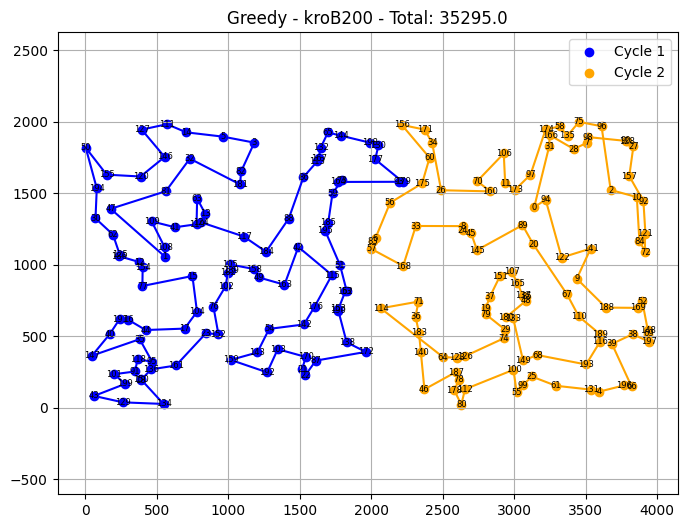

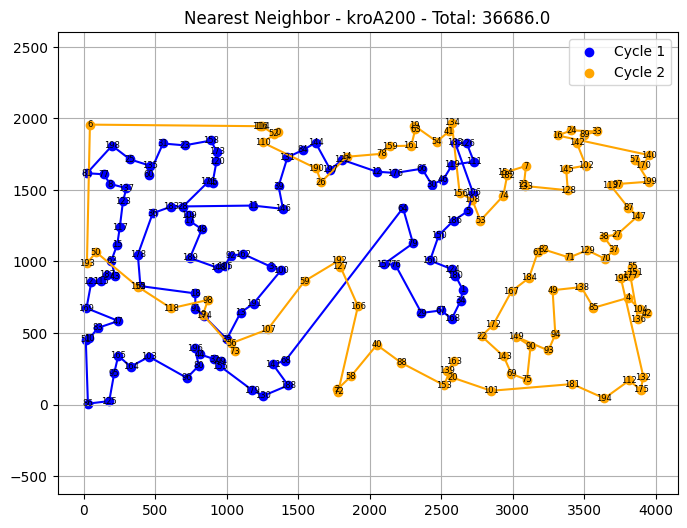

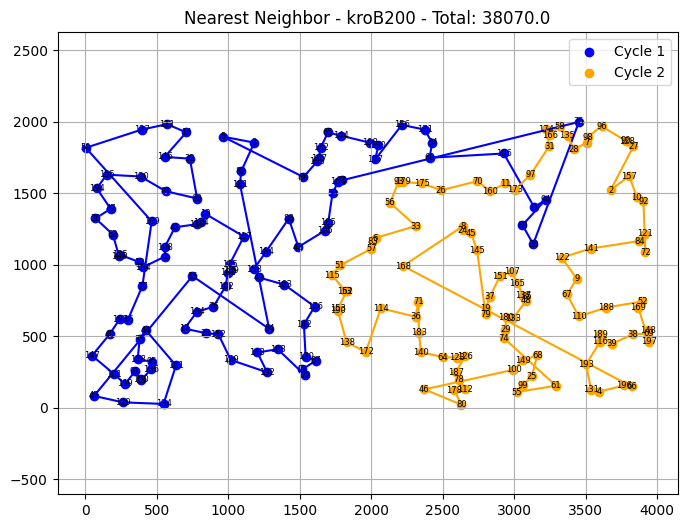

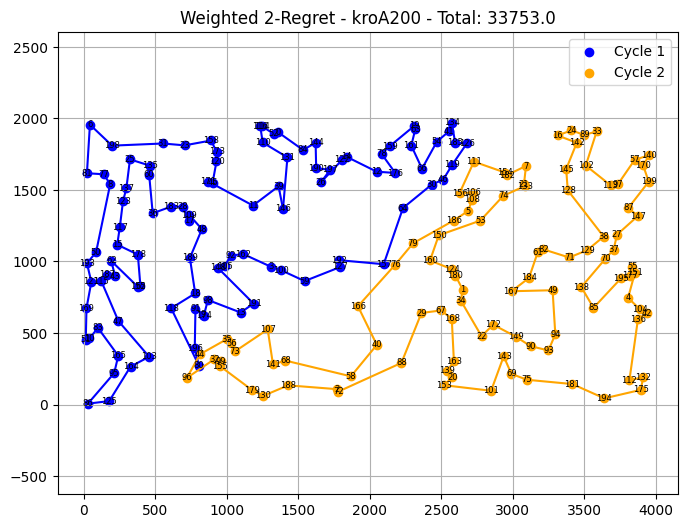

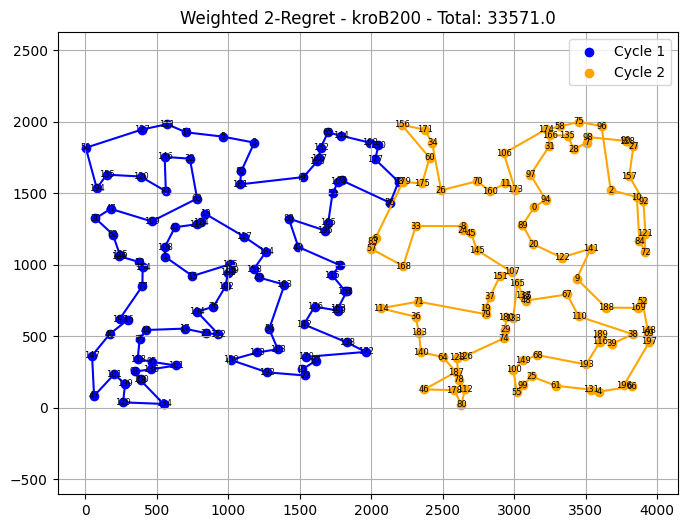

In [60]:
for i, m in min_totals.iterrows():
    cycle1 = eval(m.cycle1)
    cycle2 = eval(m.cycle2)
    if m.instance == "kroA200":
        optimizerA.plot_cycles(cycle1, cycle2, title=f"{m.method} - {m.instance} - Total: {m.total}")
    else:
        optimizerB.plot_cycles(cycle1, cycle2, title=f"{m.method} - {m.instance} - Total: {m.total}")

In [64]:
stats = df.groupby(["method", "instance"])['total'].agg(['mean', 'min', 'max']).reset_index()

# Print results
for _, row in stats.iterrows():
    print(f"Method: {row['method']} - Instance: {row['instance']}")
    print(f"Min Total: {row['min']}")
    print(f"Mean Total: {row['mean']}")
    print(f"Max Total: {row['max']}")

Method: 2-Regret - Instance: kroA200
Min Total: 42303.0
Mean Total: 44474.76
Max Total: 46527.0
Method: 2-Regret - Instance: kroB200
Min Total: 41706.0
Mean Total: 43549.49
Max Total: 44889.0
Method: Greedy - Instance: kroA200
Min Total: 35323.0
Mean Total: 38243.91
Max Total: 41224.0
Method: Greedy - Instance: kroB200
Min Total: 35295.0
Mean Total: 38512.42
Max Total: 40325.0
Method: Nearest Neighbor - Instance: kroA200
Min Total: 36686.0
Mean Total: 41961.21
Max Total: 47080.0
Method: Nearest Neighbor - Instance: kroB200
Min Total: 38070.0
Mean Total: 41993.48
Max Total: 45875.0
Method: Weighted 2-Regret - Instance: kroA200
Min Total: 33753.0
Mean Total: 36588.29
Max Total: 39423.0
Method: Weighted 2-Regret - Instance: kroB200
Min Total: 33571.0
Mean Total: 36907.34
Max Total: 38513.0
